这个文档实现的是4个线性模型：(sklearn.linear_model)
1. 线性回归模型(.LinearRegression)
2. 线性回归模型的**正则化**:岭回归(.Ridge)(考察$\alpha$)lasso(.Lasso)(考察$\alpha$)弹性网(.ElasticNet)(考察$\alpha,\rho$)
3. 逻辑回归(.LogisticRegressor)(考察C)
4. 线性判别分析/LDA（.LinearDiscriminantAnalysis）(考察solver)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis, cross_validation

首先，加载数据集函数，返回一个元组
这个数据集是sklearn自带的糖尿病病人数据集，有442个样本，10个特征，每个特征都是 -0.2到0.2之间，
目标在 25-346之间

In [30]:
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)

然后，编写使用**线性回归**的函数：

In [31]:
def test_LinearRegression(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.LinearRegression()  # 这里的 4 个参数都采用默认值
    regr.fit(X_train,y_train)
    
    print('Cofficients:%s, intercept:%.2f,'%(regr.coef_, regr.intercept_))
    print("Residual sum of squares:%.2f"% np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f'% regr.score(X_test, y_test))

In [32]:
X_train,X_test,y_train,y_test = load_data()
test_LinearRegression(X_train,X_test,y_train,y_test)

Cofficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept:153.07,
Residual sum of squares:3180.20
Score: 0.36


说明：预测得分是0.36，这个值是越大越好，1是最好

---

---

线性回归模型的正则化之**岭回归**，使用Ridge的函数如下：

In [33]:
def test_Ridge(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.Ridge()    # 这里的 8 个参数都采用默认值
    regr.fit(X_train,y_train)
    
    print('Cofficients:%s, intercept:%.2f,'%(regr.coef_, regr.intercept_))
    print("Residual sum of squares:%.2f"% np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f'% regr.score(X_test, y_test))

In [34]:
X_train,X_test,y_train,y_test = load_data()
test_Ridge(X_train,X_test,y_train,y_test)

Cofficients:[  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017], intercept:152.45,
Residual sum of squares:3192.33
Score: 0.36


预测得分分析同上

下面要检验不同的$\alpha$值对于预测性能的影响，编写测试函数

In [35]:
def test_Ridge_alpha(*data):
    X_train,X_test,y_train,y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    
    for i,alpha in enumerate(alphas):     # enumerate 函数的用法
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train,y_train)
        scores.append(regr.score(X_test,y_test))
        
    ### 绘图            具体内容可以参考《利用python进行数据分析》一书的第8章内容
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    plt.show()

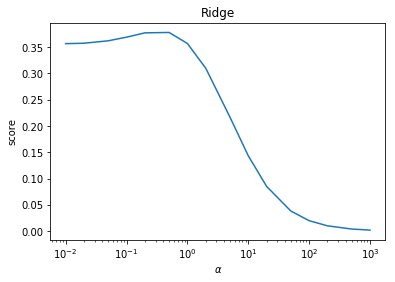

In [36]:
X_train,X_test,y_train,y_test = load_data()
test_Ridge_alpha(X_train,X_test,y_train,y_test)

---

线性回归模型的正则化之**Lasso**，使用Lasso的函数如下：

In [37]:
def test_Lasso(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.Lasso()    # 这里的 11 个参数都采用默认值
    regr.fit(X_train,y_train)
    
    print('Coefficinets:%s, intercept:%.2f'% (regr.coef_,regr.intercept_))
    print("Residual sum of squares:%.2f"% np.mean((regr.predict(X_test)-y_test)**2))
    print('Score:%.2f'% regr.score(X_test,y_test))


In [38]:
X_train,X_test,y_train,y_test = load_data()
test_Lasso(X_train,X_test,y_train,y_test)

Coefficinets:[  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ], intercept:152.52
Residual sum of squares:3583.42
Score:0.28


预测得分分析同上

下面要检验不同的α 
值对于预测性能的影响，编写测试函数

In [39]:
def test_Lasso_alpha(*data):
    X_train,X_test,y_train,y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200 ,500, 1000]
    scores = []
    
    for i,alpha in enumerate(alphas):
        regr = linear_model.Lasso(alpha = alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test,y_test))
        
    ### 绘图            具体内容可以参考《利用python进行数据分析》一书的第8章内容
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Lasso")
    plt.show()

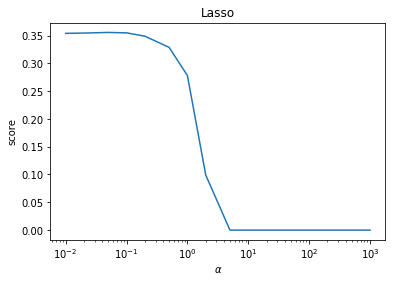

In [40]:
X_train,X_test,y_train,y_test = load_data()
test_Lasso_alpha(X_train,X_test,y_train,y_test)

---

线性回归模型的正则化之**ElasticNet**，使用ElasticNet的函数如下：

In [41]:
def test_ElasticNet(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.ElasticNet()    # 这里的 12 个参数都采用默认值
    regr.fit(X_train,y_train)
    
    print('Coefficinets:%s, intercept:%.2f'% (regr.coef_,regr.intercept_))
    print("Residual sum of squares:%.2f"% np.mean((regr.predict(X_test)-y_test)**2))
    print('Score:%.2f'% regr.score(X_test,y_test))

In [42]:
X_train,X_test,y_train,y_test = load_data()
test_ElasticNet(X_train,X_test,y_train,y_test)

Coefficinets:[ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707], intercept:151.93
Residual sum of squares:4922.36
Score:0.01


下面要检验不同的α $\rho$值对于预测性能的影响，编写测试函数

In [43]:
def test_ElasticNet_alpha_rho(*data):
    X_train,X_test,y_train,y_test = data
    alphas = np.logspace(-2,2)
    rhos = np.linspace(0.01,1)
    scores = []
    
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha = alpha, l1_ratio = rho)
            regr.fit(X_train,y_train)
            scores.append(regr.score(X_test,y_test))
            
    ### 绘图       具体内容可以参考《利用python进行数据分析》一书的第8章内容
    alphas, rhos = np.meshgrid(alphas,rhos)
    scores = np.array(scores).reshape(alphas.shape)
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(alphas, rhos, scores, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_zlabel("score")
    ax.set_title("ElasticNet")
    plt.show()           

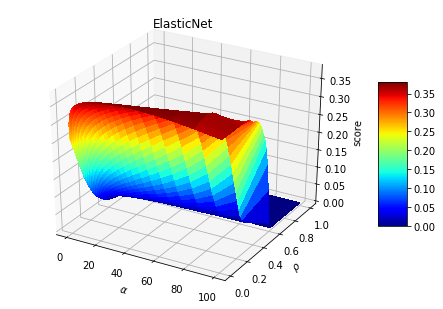

In [44]:
X_train,X_test,y_train,y_test = load_data()
test_ElasticNet_alpha_rho(X_train,X_test,y_train,y_test)

---

---

**逻辑回归模型**
    
    这个示例采用的是鸢尾花数据集，这个数据集一共有150个数据，有3类，每类50个数据，每个数据有4个属性

加载数据

In [45]:
def load_data():
    iris = datasets.load_iris()
    X_train = iris.data
    y_train = iris.target
    return cross_validation.train_test_split(X_train, y_train, test_size=0.25, 
                                             random_state=0, stratify=y_train)

编写测试函数

In [46]:
def test_LogisticRegression(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.LogisticRegression()  # 参数 14个都采用默认值
    regr.fit(X_train,y_train)
    
    print('Coefficinets:%s, intercept:%s'% (regr.coef_,regr.intercept_))
    print('Score:%.2f'% regr.score(X_test,y_test))

调用函数

In [47]:
X_train,X_test,y_train,y_test = load_data()
test_LogisticRegression(X_train,X_test,y_train,y_test)

Coefficinets:[[ 0.39310895  1.35470406 -2.12308303 -0.96477916]
 [ 0.22462128 -1.34888898  0.60067997 -1.24122398]
 [-1.50918214 -1.29436177  2.14150484  2.2961458 ]], intercept:[ 0.24122458  1.13775782 -1.09418724]
Score:0.97


预测准确率是97%

编写**多类分类**的测试函数,需要改两个参数

In [48]:
def test_LogisticRegression_mutinomial(*data):
    X_train,X_test,y_train,y_test = data
    regr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
    regr.fit(X_train,y_train)
    
    print('Coefficinets:%s, intercept:%s'% (regr.coef_,regr.intercept_))
    print('Score:%.2f'% regr.score(X_test,y_test))

In [49]:
X_train,X_test,y_train,y_test = load_data()
test_LogisticRegression_mutinomial(X_train,X_test,y_train,y_test)

Coefficinets:[[-0.38364864  0.85514793 -2.27245169 -0.98438982]
 [ 0.34364497 -0.37347772 -0.03013523 -0.86120475]
 [ 0.04000367 -0.48167021  2.30258692  1.84559457]], intercept:[  8.79930393   2.46613158 -11.26543552]
Score:1.00


预测准确率是100%

---

---

**LDA线性判别分析**

    同样采用鸢尾花数据集

In [50]:
def test_LinearDiscriminantAnalysis(*data):
    X_train,X_test,y_train,t_test = data
    lda = discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    
    print('Cofficients:%s, intercept:%s'%(lda.coef_,lda.intercept_))
    print('Score:%.2f'%lda.score(X_test,y_test))

In [51]:
X_train,X_test,y_train,y_test = load_data()
test_LinearDiscriminantAnalysis(X_train,X_test,y_train,y_test)

Cofficients:[[  6.575853     9.75807593 -14.34026669 -21.39076537]
 [ -1.98385061  -3.49791089   4.21495042   2.60304299]
 [ -4.47116022  -6.09542385   9.85886057  18.29330864]], intercept:[-15.33097142   0.46730077 -30.53297367]
Score:1.00


绘制LDA降维后的数据集函数

In [56]:
def plot_LDA(converted_X,y):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = 'rgb'
    markers = 'o*s'
    
    for target,color,marker in zip([0,1,2], colors, markers):
        pos = (y==target).ravel()
        X = converted_X[pos,:]
        ax.scatter(X[:,0], X[:,1], X[:,2], color = color, marker = marker, 
                   label = "Label %d"%target)
        ax.legend(loc="best")
        fig.suptitle("Iris after LDA")
        plt.show()

调用上面的函数

S:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


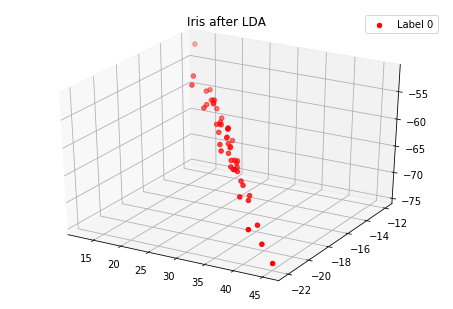

In [57]:
X_train, X_test, y_train, y_test = load_data()
X = np.vstack((X_train,X_test))
Y = np.vstack((y_train.reshape(y_train.size,1), y_test.reshape(y_test.size,1)))
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X,Y)
converted_X = np.dot(X, np.transpose(lda.coef_)) + lda.intercept_
plot_LDA(converted_X,Y)

注：书上的图长得不是这样的···

接下来考察不同的solver参数对预测性能的影响，编写测试函数如下：

In [60]:
def test_LinearDiscriminantAnalysis_solver(*data):
    X_train,X_test,y_train,y_test = data
    solvers = ['svd','lsqr','eigen']
    for solver in solvers:
        if(solver == 'svd'):
            lda = discriminant_analysis.LinearDiscriminantAnalysis(solver=solver)
        else:
            lda = discriminant_analysis.LinearDiscriminantAnalysis(solver=solver, shrinkage = None)
        lda.fit(X_train, y_train)
        print('Score at solver=%s:%.2f'%(solver, lda.score(X_test,y_test)))

调用函数

In [61]:
X_train,X_test,y_train,y_test = load_data()
test_LinearDiscriminantAnalysis_solver(X_train,X_test,y_train,y_test)

Score at solver=svd:1.00
Score at solver=lsqr:1.00
Score at solver=eigen:1.00


最后考察在solver=lsqr中引入抖动，即引入正则化项，测试函数如下

In [66]:
def test_LinearDiscriminantAnalysis_shrinkage(*data):
    X_train,X_test,y_train,y_test = data
    shrinkages = np.linspace(0.0, 1.0, num = 20)
    scores = []
    
    for shrinkage in shrinkages:
        lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr', shrinkage = shrinkage)
        lda.fit(X_train,y_train)
        scores.append(lda.score(X_test,y_test))
        
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(shrinkages, scores)
    ax.set_xlabel(r"shrinkage")
    ax.set_ylabel(r"score")
    ax.set_ylim(0, 1.05)
    ax.set_title("LinearDiscriminantAnalysis")
    plt.show()

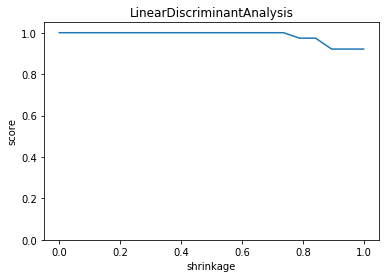

In [67]:
X_train,X_test,y_train,y_test = load_data()
test_LinearDiscriminantAnalysis_shrinkage(X_train,X_test,y_train,y_test)